# Ongoing exploration of p-value and confidence intervals from simulations.

In this notebook, I'm aiming to reproduce various bits of different published papers, and also some original hypothesis testing and exploratory simulations. The topic of meta-research is extremely interesting, and this notebook is a critical investigation into statistical tools and metrics that scientits use every day for decision-making purposes and evaluation of their results.

In [2]:
import pandas as pd
import random
from matplotlib import pyplot as plt
import seaborn as sn
import numpy as np
import scipy.stats as stats
from scipy.stats import norm


## Part 1. Generation of samples from simulated distributions. 

I'm aiming to generate random samples from different types of distribution, starting with gaussian one. This is because most of natural data is distributed normally, or (as you will see later on) approaches normality if sufficient large samples or number of samples are taken.

In [356]:
# This is the first method to generate a seed of 1000 values from a normal distribution with set parameters 
# The loop is iterating 1000 times and appending the random values with the random function/gauss method to an empty list

pop=[]
for i in range (1000):
    pop.append(random.gauss(0, 1))

# Here I make use of the numpy random.normal method to generate the same result

pop2 = np.random.normal(0.5, 1, 1000)
pop2 = list(pop2) #Here we have to transform the output of the np.random.normal method into a list, otherwise it won't be utilizable later on

### Plotting the data for visual proof

Here I needed the visual proof of normality. There are also statistical methods to assess a dataset for normality, but since we are talking about 1000 observation, visual proof will be more than enough.

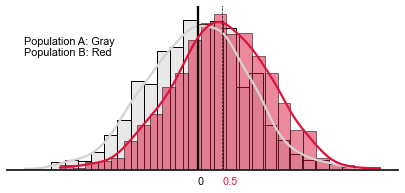

In [47]:
bins1 = sn.histplot(pop, color="lightgray", edgecolor="black", linewidth=1, kde=True)
plt.axvline(0,0,100,color="black")
bins1.axes.yaxis.set_visible(False)
bins1.axes.xaxis.set_visible(False)
plt.text(-3.5,80,'Population A: Gray\nPopulation B: Red',color="black")
plt.text(0,-10,'0',color="black")
plt.text(0.5,-10,'0.5',color="crimson")

bins2 = sn.histplot(pop2, color="crimson", edgecolor="black", linewidth=.5, kde=True)
plt.axvline(0.5,0,100,color="black", ls="dashed", lw=.7)

plt.savefig("popdistri.svg")

## Simulating 1000 t-test 

## Solution 1: Simulating 1000 t-tests

In [5]:
results = pd.DataFrame({'Effect Size':[], 'p-value':[]})
for i in range(10000):
    sample1 = np.random.normal(0,1,1000)
    sample2 = np.random.normal(.05,1,1000)
    effect_size, pvalue = stats.ttest_ind(a=sample1, b=sample2, equal_var=True)
    results.loc[i,:] = [effect_size,pvalue]

results

,Effect Size,p-value
0,-0.712933,0.475971
1,-1.036818,0.299946
2,-0.784664,0.432744
3,-2.613254,0.009036
4,-2.789788,0.005324
...,...,...
9995,-1.042110,0.297487
9996,0.357134,0.721029
9997,-1.813238,0.069945
9998,-0.085830,0.931610


## Solution 2: Simulating 1000 t-tests
    

    




In [282]:
from numpy import std, mean, sqrt

results10 = []
results30 = []
results60 = []
results100 = []

def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (mean(x) - mean(y)) / sqrt(((nx-1)*std(x, ddof=1) ** 2 + (ny-1)*std(y, ddof=1) ** 2) / dof)

for i in range(1000):
    sample11 = random.sample(pop, 10)
    sample21 = random.sample(pop2, 10)
    effect_size, pvalue = stats.ttest_ind(b=sample11, a=sample21, equal_var=True)
    effect_size = cohen_d(sample21,sample11)
    results10.append([effect_size, pvalue])

df10 = pd.DataFrame(results10, columns=['Effect Size', 'p-value'])

for i in range(1000):
    sample12 = random.sample(pop, 30)
    sample22 = random.sample(pop2, 30)
    effect_size, pvalue = stats.ttest_ind(b=sample12, a=sample22, equal_var=True)
    effect_size = cohen_d(sample22,sample12)
    results30.append([effect_size, pvalue])

df30 = pd.DataFrame(results30, columns=['Effect Size', 'p-value'])

for i in range(1000):
    sample13 = random.sample(pop, 60)
    sample23 = random.sample(pop2, 60)
    effect_size, pvalue = stats.ttest_ind(b=sample13, a=sample23, equal_var=True)
    effect_size = cohen_d(sample23,sample13)
    results60.append([effect_size, pvalue])

df60 = pd.DataFrame(results60, columns=['Effect Size', 'p-value'])

for i in range(1000):
    sample14 = random.sample(pop, 100)
    sample24 = random.sample(pop2, 100)
    effect_size, pvalue = stats.ttest_ind(b=sample14, a=sample24, equal_var=True)
    effect_size = cohen_d(sample24,sample14)
    results100.append([effect_size, pvalue])

df100 = pd.DataFrame(results100, columns=['Effect Size', 'p-value'])

In [283]:
#Transforming the obtained p-value in the log10 format and adding as a new column

df10["log10"] = np.nan
df10["log10"] = np.log10(df10["p-value"])

df30["log10"] = np.nan
df30["log10"] = np.log10(df30["p-value"])

df60["log10"] = np.nan
df60["log10"] = np.log10(df60["p-value"])

df100["log10"] = np.nan
df100["log10"] = np.log10(df100["p-value"])



In [284]:
# Counting the number of p-values that are significative.

tensamples = df10['p-value'].to_list()
a = sum(i < .05 for i in tensamples)

thirsamples = df30['p-value'].to_list()
b = sum(i < .05 for i in thirsamples)

sixtsamples = df60['p-value'].to_list()
c = sum(i < .05 for i in sixtsamples)

hundrsamples = df100['p-value'].to_list()
d = sum(i < .05 for i in hundrsamples)

print(a,b,c,d)

173 462 754 942


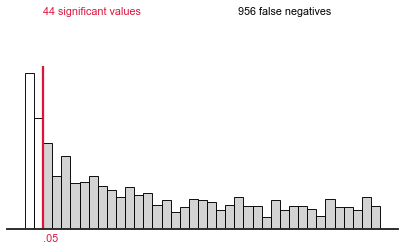

In [256]:
# plottling the same histogram with seaborn
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "axes.spines.left": False, "figure.figsize":(7,3)}
sn.set_theme(context='talk', style='white', font='sans-serif', font_scale=.6, rc=custom_params)


plimit = 0.05

g = sn.histplot(x='p-value', data=df10, color="#FFF", edgecolor="black", bins=39)
plt.axvline(0.05, 0,1, color="Crimson")
plt.text(.05,150,'44 significant values', color="Crimson")
plt.text( .6,150,'956 false negatives', color="black")
plt.text(.05,-9.15,'.05',rotation=0, color="Crimson")
g.axes.yaxis.set_visible(False)
g.axes.xaxis.set_visible(False)

for rectangle in g.patches:
    if rectangle.get_x() >= plimit:
        rectangle.set_facecolor('LightGrey')
        


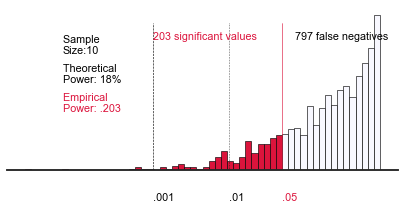

In [257]:
#plotting the same graph with sample size 10 but in a log10 scale

plimit = np.log10(.05)
plimit1 = np.log10(.01)
plimit2 = np.log10(.001)

g = sn.histplot(x='log10', data=df10, color="#FFF", edgecolor="black", bins=58)
plt.axvline(plimit, 0,.9, color="Crimson", lw=.6)
plt.axvline(plimit1, 0,.9, color="black", ls='dotted', lw=.6)
plt.axvline(plimit2, 0,.9, color="black", ls='dashed', lw=.6)
plt.text(-4.2,60,'Theoretical \nPower: 18%', color="black")
plt.text(-4.2,40,'Empirical \nPower: .203', color="Crimson")
plt.text(-4.2,80,'Sample \nSize:10', color="black")
plt.text(-3,90,'203 significant values', color="Crimson")
plt.text(-1.13,90,'797 false negatives', color="black")
plt.text(plimit,-21.2,'.05',rotation=0, color="Crimson")
plt.text(plimit1,-21.2,'.01',rotation=0, color="black")
plt.text(plimit2,-21.2,'.001',rotation=0, color="black")
g.axes.yaxis.set_visible(False)
g.axes.xaxis.set_visible(False)

for rectangle in g.patches:
    if rectangle.get_x() >= plimit:
        rectangle.set_facecolor('GhostWhite')

for rectangle in g.patches:
    if rectangle.get_x() <= plimit:
        rectangle.set_facecolor('Crimson')
        
plt.savefig("ttest10samples.svg")

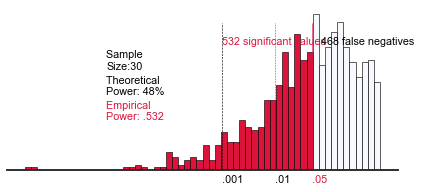

In [258]:
# Same Graph but for the 30 sample sizes

plimit = np.log10(.05)
plimit1 = np.log10(.01)
plimit2 = np.log10(.001)

g1 = sn.histplot(data=df30, x="log10", color="#FFF", edgecolor="black", bins=58)
plt.axvline(plimit, 0,.9, color="Crimson", lw=.6)
plt.axvline(plimit1, 0,.9, color="black", ls='dotted', lw=.6)
plt.axvline(plimit2, 0,.9, color="black", ls='dashed', lw=.6)
plt.text(-5.2,30,'Theoretical \nPower: 48%', color="black")
plt.text(-5.2,20,'Empirical \nPower: .532', color="Crimson")
plt.text(-5.2,40,'Sample \nSize:30', color="black")
plt.text(-3,50,'532 significant values', color="Crimson")
plt.text(-1.13,50,'468 false negatives', color="black")
plt.text(plimit,-5.2,'.05',rotation=0, color="Crimson")
plt.text(plimit1,-5.2,'.01',rotation=0, color="black")
plt.text(plimit2,-5.2,'.001',rotation=0, color="black")
g1.axes.yaxis.set_visible(False)
g1.axes.xaxis.set_visible(False)

for rectangle in g1.patches:
    if rectangle.get_x() >= plimit:
        rectangle.set_facecolor('GhostWhite')

for rectangle in g1.patches:
    if rectangle.get_x() <= plimit:
        rectangle.set_facecolor('Crimson')
        
plt.savefig("ttest30samples.svg")

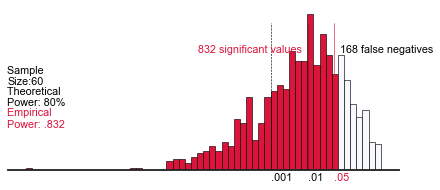

In [259]:
# Same Graph but for the 60 sample sizes

plimit = np.log10(.05)
plimit1 = np.log10(.01)
plimit2 = np.log10(.001)

g2 = sn.histplot(data=df60, x="log10", color="#FFF", edgecolor="black", bins=58)
plt.axvline(plimit, 0,.9, color="Crimson", lw=.6)
plt.axvline(plimit1, 0,.9, color="black", ls='dotted', lw=.6)
plt.axvline(plimit2, 0,.9, color="black", ls='dashed', lw=.6)
plt.text(-10.2,30,'Theoretical \nPower: 80%', color="black")
plt.text(-10.2,20,'Empirical \nPower: .832', color="Crimson")
plt.text(-10.2,40,'Sample \nSize:60', color="black")
plt.text(-5,55,'832 significant values', color="Crimson")
plt.text(-1.13,55,'168 false negatives', color="black")
plt.text(plimit,-5.2,'.05',rotation=0, color="Crimson")
plt.text(plimit1,-5.2,'.01',rotation=0, color="black")
plt.text(plimit2,-5.2,'.001',rotation=0, color="black")
g2.axes.yaxis.set_visible(False)
g2.axes.xaxis.set_visible(False)

for rectangle in g2.patches:
    if rectangle.get_x() >= plimit:
        rectangle.set_facecolor('GhostWhite')

for rectangle in g2.patches:
    if rectangle.get_x() <= plimit:
        rectangle.set_facecolor('Crimson')
        
plt.savefig("ttest60samples.svg")

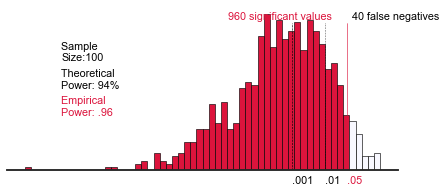

In [260]:
# Same Graph but for the 100 sample sizes

plimit = np.log10(.05)
plimit1 = np.log10(.01)
plimit2 = np.log10(.001)

g3 = sn.histplot(data=df100, x="log10", color="#FFF", edgecolor="black", bins=58)
plt.axvline(plimit, 0,.9, color="Crimson", lw=.6)
plt.axvline(plimit1, 0,.9, color="black", ls='dotted', lw=.6)
plt.axvline(plimit2, 0,.9, color="black", ls='dashed', lw=.6)
plt.text(-10.2,30,'Theoretical \nPower: 94%', color="black")
plt.text(-10.2,20,'Empirical \nPower: .96', color="Crimson")
plt.text(-10.2,40,'Sample \nSize:100', color="black")
plt.text(-5,55,'960 significant values', color="Crimson")
plt.text(-1.13,55,'40 false negatives', color="black")
plt.text(plimit,-5.2,'.05',rotation=0, color="Crimson")
plt.text(plimit1,-5.2,'.01',rotation=0, color="black")
plt.text(plimit2,-5.2,'.001',rotation=0, color="black")
g3.axes.yaxis.set_visible(False)
g3.axes.xaxis.set_visible(False)

for rectangle in g3.patches:
    if rectangle.get_x() >= plimit:
        rectangle.set_facecolor('GhostWhite')

for rectangle in g3.patches:
    if rectangle.get_x() <= plimit:
        rectangle.set_facecolor('Crimson')
        
plt.savefig("ttest100samples.svg")

In [281]:
#Calculating the 95% CI of the effect size distributions in the 4 different simulations (d10,d30,d60,d100)

ci10 = stats.norm.interval(0.95, loc= np.mean(df10['Effect Size']), scale= np.std(df10['Effect Size']))
ci30 = stats.norm.interval(0.95, loc= np.mean(df30['Effect Size']), scale= np.std(df30['Effect Size']))
ci60 = stats.norm.interval(0.95, loc= np.mean(df60['Effect Size']), scale= np.std(df60['Effect Size']))
ci100 = stats.norm.interval(0.95, loc= np.mean(df100['Effect Size']), scale= np.std(df100['Effect Size']))

print(ci10,ci30,ci60,ci100)

diff10 = ci10[0]-ci10[1]
diff30 = ci30[0]-ci30[1]
diff60 = ci60[0]-ci60[1]
diff100 = ci100[0]-ci100[1]

print(diff10,diff30,diff60,diff100)

(-0.4517477398771528, 1.4624458987774114) (-0.024601558531492262, 0.9962692205567427) (0.1440804491134332, 0.8229226261006694) (0.20653068537696456, 0.7631572578194508)
-1.9141936386545642 -1.020870779088235 -0.6788421769872361 -0.5566265724424861


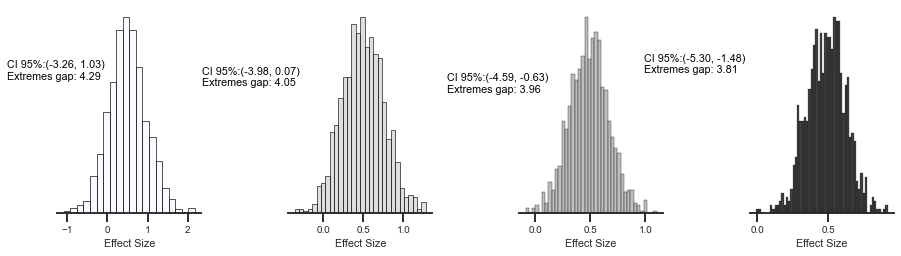

In [326]:
# Adjusting again the aesthetic paramethers of the seaborn theme to have a different result.
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "axes.spines.left": False}
sn.set_theme(context='talk', style='ticks', font='sans-serif', font_scale=.6, rc=custom_params)

intervals = plt.figure(figsize=[15,3.8])
intervals.subplots_adjust(hspace=0.4, wspace=.6)
#This is the first graph of the grid
ax = intervals.add_subplot(1,4,1)
sn.histplot(data=df10, x="Effect Size", color="GhostWhite", edgecolor="black", bins=20)
ax.axes.yaxis.set_visible(False)
plt.text(-2.5,100,'CI 95%:(-3.26, 1.03)\nExtremes gap: 4.29', color="black")
#This is the second graph of the grid
ax = intervals.add_subplot(1,4,2)
sn.histplot(data=df30, x="Effect Size", color="LightGray", edgecolor="black", lw=.6, bins=30)
ax.axes.yaxis.set_visible(False)
plt.text(-1.5,55,'CI 95%:(-3.98, 0.07)\nExtremes gap: 4.05', color="black")
#This is the third graph of the grid
ax = intervals.add_subplot(1,4,3)
sn.histplot(data=df60, x="Effect Size", color="DarkGray", edgecolor="black", bins=40)
ax.axes.yaxis.set_visible(False)
plt.text(-0.8,46,'CI 95%:(-4.59, -0.63)\nExtremes gap: 3.96', color="black")
#This is the fourth graph of the grid
ax = intervals.add_subplot(1,4,4)
sn.histplot(data=df100, x="Effect Size", color="Black", edgecolor="black", bins=58)
ax.axes.yaxis.set_visible(False)
plt.text(-0.8,35,'CI 95%:(-5.30, -1.48)\nExtremes gap: 3.81', color="black")

plt.savefig('CIgrid.svg')

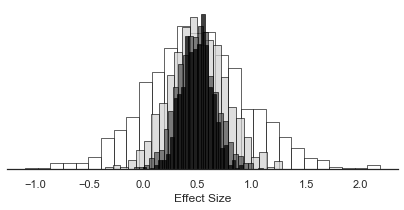

In [327]:
# Just a different way to display the narrowing of the confidence intervals. 
sn.set_theme(style="white", rc=custom_params)
tr=sn.histplot(data=df10, x='Effect Size', color="white", edgecolor="black", linewidth=.6)
sn.histplot(data=df30, x='Effect Size', color="lightgray", edgecolor="black", linewidth=.6)
sn.histplot(data=df60, x='Effect Size', color="#595959", edgecolor="black", linewidth=.6)
sn.histplot(data=df100, x='Effect Size', color="black", edgecolor="black", linewidth=.6)
tr.axes.yaxis.set_visible(False)

plt.savefig('centrality.svg')

<AxesSubplot:xlabel='log10', ylabel='Effect Size'>

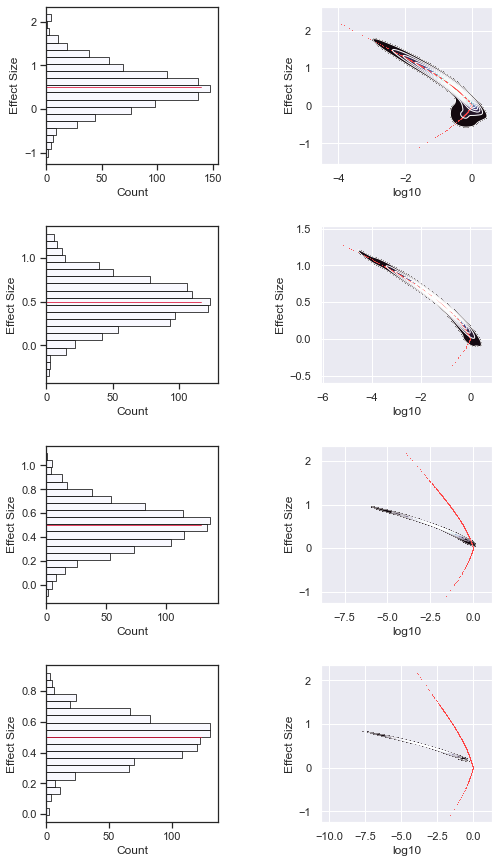

In [289]:
# Visualization of the distribution of p-values and effect sizes


density = plt.figure(figsize=[8,15])
density.subplots_adjust(hspace=0.4, wspace=.6)
#Graph number 1 histogram
sn.set_theme(style="ticks")
ay = density.add_subplot(4,2,1)
sn.histplot(data=df10, y="Effect Size", color="GhostWhite", edgecolor="black", bins=20)
plt.axhline(0.5, 0,.9, color="Crimson", lw=.8)
#Graph number 2 should be a density plot
sn.set_theme(style="darkgrid")
ay = density.add_subplot(4,2,2)
sn.kdeplot(data=df10, x="log10", y="Effect Size", levels=10, cmap='mako', fill=True)
sn.kdeplot(data=df10, x="log10", y="Effect Size", levels=10, color="white", linewidths=1)
sn.scatterplot(data=df10, x="log10",y="Effect Size", s=1, color="Red")
#Graph number 3 should be a histogram
sn.set_theme(style="ticks")
ay = density.add_subplot(4,2,3)
sn.histplot(data=df30, y="Effect Size", color="GhostWhite", edgecolor="black", bins=20)
plt.axhline(0.5, 0,.9, color="Crimson", lw=.8)
#Graph number 4 should be a density plot
sn.set_theme(style="darkgrid")
ay = density.add_subplot(4,2,4)
sn.kdeplot(data=df30, x="log10", y="Effect Size", levels=10, cmap='mako', fill=True)
sn.kdeplot(data=df30, x="log10", y="Effect Size", levels=10, color="white", linewidths=1)
sn.scatterplot(data=df30, x="log10",y="Effect Size", s=1, color="Red")
#Graph number 5 should be a histogram
sn.set_theme(style="ticks")
ay = density.add_subplot(4,2,5)
sn.histplot(data=df60, y="Effect Size", color="GhostWhite", edgecolor="black", bins=20)
plt.axhline(0.5, 0,.9, color="Crimson", lw=.8)
#Graph number 6 should be a density plot
sn.set_theme(style="darkgrid")
ay = density.add_subplot(4,2,6)
sn.kdeplot(data=df60, x="log10", y="Effect Size", levels=10, cmap='mako', fill=True)
sn.kdeplot(data=df60, x="log10", y="Effect Size", levels=10, color="white", linewidths=.5)
sn.scatterplot(data=df10, x="log10",y="Effect Size", s=1, color="Red")
#Graph number 7 should be a histogram
sn.set_theme(style="ticks")
ay = density.add_subplot(4,2,7)
sn.histplot(data=df100, y="Effect Size", color="GhostWhite", edgecolor="black", bins=20)
plt.axhline(0.5, 0,.9, color="Crimson", lw=.8)
#Graph number 8 should be a density plot
sn.set_theme(style="darkgrid")
ay = density.add_subplot(4,2,8)
sn.kdeplot(data=df100, x="log10", y="Effect Size", levels=10, cmap='mako', fill=True)
sn.kdeplot(data=df100, x="log10", y="Effect Size", levels=10, color="white", linewidths=.5)
sn.scatterplot(data=df10, x="log10",y="Effect Size", s=1, color="Red")


## Critique part: confidence intervals estimation with different sample sizes

In [ ]:
#Calculating the 95% CI of the effect size distributions in the 4 different simulations (d10,d30,d60,d100)

ci10 = stats.norm.interval(0.95, loc= np.mean(df10['Effect Size']), scale= np.std(df10['Effect Size']))
ci30 = stats.norm.interval(0.95, loc= np.mean(df30['Effect Size']), scale= np.std(df30['Effect Size']))
ci60 = stats.norm.interval(0.95, loc= np.mean(df60['Effect Size']), scale= np.std(df60['Effect Size']))
ci100 = stats.norm.interval(0.95, loc= np.mean(df100['Effect Size']), scale= np.std(df100['Effect Size']))

print(ci10,ci30,ci60,ci100)

diff10 = ci10[0]-ci10[1]
diff30 = ci30[0]-ci30[1]
diff60 = ci60[0]-ci60[1]
diff100 = ci100[0]-ci100[1]

print(diff10,diff30,diff60,diff100)

In [354]:
cilist10 = []
cilist30 = []
cilist60 = []
cilist100 = []


for i in range(1000):
    lower_bound,upper_bound = stats.norm.interval(0.95, loc= df10['Effect Size'], scale= 1)
    
cilist10 = {'Lower Bound':lower_bound,'Upper Bound':upper_bound}
cidf10 = pd.DataFrame(cilist10, columns=['Upper Bound', 'Lower Bound'])
cidf10['95% CI width']= cidf10['Upper Bound']-cidf10['Lower Bound']

for i in range(1000):
    lower_bound,upper_bound = stats.norm.interval(0.95, loc= df100['Effect Size'], scale= 1)
    
cilist100 = {'Lower Bound':lower_bound,'Upper Bound':upper_bound}
cidf100 = pd.DataFrame(cilist100, columns=['Upper Bound', 'Lower Bound'])
cidf100['95% CI width']= cidf100['Upper Bound']-cidf100['Lower Bound']

cidf10

,Upper Bound,Lower Bound,95% CI width
0,2.256101,-1.663827,3.919928
1,2.415140,-1.504788,3.919928
2,2.672751,-1.247177,3.919928
3,2.094969,-1.824959,3.919928
4,3.377296,-0.542632,3.919928
...,...,...,...
995,1.985376,-1.934552,3.919928
996,3.122918,-0.797010,3.919928
997,2.283301,-1.636627,3.919928
998,3.305729,-0.614199,3.919928
